### MLP (Multi-Layer Perceptron)

# Sección nueva

In [51]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import numpy as np 

from sklearn.neural_network import MLPClassifier

In [52]:
muon=pd.read_csv('muon.csv')

muon.head()

,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,DOCAtwo,DOCAthree,IP_p0p2,IP_p1p2,isolationa,isolationb,isolationc,isolationd,isolatione,isolationf,iso,CDF1,CDF2,CDF3,ISO_SumBDT,p0_IsoBDT,p1_IsoBDT,p2_IsoBDT,p0_track_Chi2Dof,p1_track_Chi2Dof,p2_track_Chi2Dof,p0_IP,p1_IP,p2_IP,p0_IPSig,p1_IPSig,p2_IPSig,p0_pt,p1_pt,p2_pt,p0_p,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,production,signal,mass,min_ANNmuon
0,18453471,0.001578,0.999999,14.033335,0.681401,0.016039,0.451886,1.900433,1482.037476,0.066667,0.060602,0.083660,0.208855,0.074343,8,5,7,1.0,0.0,3.0,4.0,0.473952,0.349447,0.329157,-0.579324,-0.256309,-0.215444,-0.107570,1.921700,0.866657,1.230708,0.988054,0.601483,0.277090,16.243183,4.580875,5.939936,353.819733,448.369446,1393.246826,3842.096436,12290.760742,39264.398438,3.076006,4.003800,4.031514,458,-99,0,1866.300049,0.277559
1,5364094,0.000988,0.999705,5.536157,0.302341,0.142163,9.564503,0.865666,3050.720703,0.024022,0.019245,0.030784,0.336345,0.173161,7,12,2,0.0,1.0,1.0,2.0,0.325785,0.265939,0.192599,-0.873926,-0.223774,-0.224871,-0.425281,0.958776,0.858357,1.810709,0.098752,0.219099,0.614524,3.610463,15.555593,11.238523,656.524902,2033.918701,747.137024,8299.368164,16562.667969,7341.257812,3.228553,2.786543,2.975564,406,-99,0,1727.095947,0.225924
2,11130990,0.000877,0.999984,6.117302,0.276463,0.034746,1.970751,10.975849,3895.908691,0.055044,0.047947,0.096829,0.169165,0.079789,1,0,1,0.0,0.0,0.0,0.0,1.000000,0.786482,0.557760,-0.479636,-0.202451,-0.100762,-0.176424,0.720973,1.408519,1.038347,0.186143,0.215668,0.371820,4.851371,11.590331,13.723293,658.523743,2576.380615,963.652466,11323.134766,22695.388672,10225.309570,3.536903,2.865686,3.052810,196,-99,0,1898.588013,0.368630
3,15173787,0.000854,0.999903,5.228067,0.220739,0.076389,4.271331,3.276358,4010.781738,0.053779,0.006417,0.044816,0.050989,0.068167,2,2,4,0.0,0.0,0.0,0.0,1.000000,0.501195,0.501195,-0.439453,-0.162267,-0.176424,-0.100762,1.172767,2.044164,0.811454,0.255752,0.210698,0.392195,7.292110,8.778173,16.462036,1047.216187,1351.734131,1685.003662,11502.081055,16909.515625,9141.426758,3.087461,3.218034,2.375592,137,-99,0,1840.410034,0.246045
4,1102544,0.001129,0.999995,39.069534,1.898197,0.120936,4.984982,0.468348,4144.546875,0.004491,0.037326,0.019026,0.172065,0.131732,0,2,0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.639926,-0.822285,-0.291524,-0.261078,-0.269682,1.523252,0.435325,0.581312,0.270755,0.183355,0.630763,6.783962,3.342091,17.252840,1442.538208,1755.792236,1282.428711,74117.117188,97612.804688,47118.785156,4.632295,4.711155,4.296878,477,-99,0,1899.793945,0.222060


In [53]:
for i in muon.columns[1:]:
  muon[i] = muon[i].astype('float32')

In [54]:
muon.dtypes

id                       int64
LifeTime               float32
dira                   float32
FlightDistance         float32
FlightDistanceError    float32
IP                     float32
IPSig                  float32
VertexChi2             float32
pt                     float32
DOCAone                float32
DOCAtwo                float32
DOCAthree              float32
IP_p0p2                float32
IP_p1p2                float32
isolationa             float32
isolationb             float32
isolationc             float32
isolationd             float32
isolatione             float32
isolationf             float32
iso                    float32
CDF1                   float32
CDF2                   float32
CDF3                   float32
ISO_SumBDT             float32
p0_IsoBDT              float32
p1_IsoBDT              float32
p2_IsoBDT              float32
p0_track_Chi2Dof       float32
p1_track_Chi2Dof       float32
p2_track_Chi2Dof       float32
p0_IP                  float32
p1_IP   

In [55]:
X=muon.drop(columns=['id', 'production', 'signal', 'mass', 'min_ANNmuon'])

y=muon.signal

In [56]:
X = X[~X.isin([np.nan, np.inf, -np.inf]).any(1)]


In [57]:
X_s=StandardScaler().fit_transform(X)

In [58]:
X_train, X_test, y_train, y_test=tts(X_s, y)

In [59]:
mlp=MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', max_iter=500)

mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [60]:
y_pred=mlp.predict(X_test)

y_prob=mlp.predict_proba(X_test)

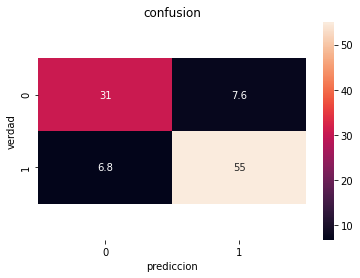

In [61]:
confusion=confusion_matrix(y_test, y_pred)
ax=sns.heatmap((confusion/len(y_pred)*100), annot=True)
b, t=ax.get_ylim()
ax.set_ylim(b+.5, t-.5)
plt.xlabel('prediccion')
plt.ylabel('verdad')
plt.title('confusion')
plt.show();

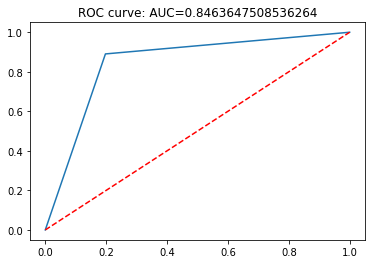

In [62]:
fpr, tpr, umb=roc_curve(y_test, y_pred)
auc=roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.title('ROC curve: AUC={}'.format(auc))
plt.show();

# esto esta mal, tiene que ser con y_prob

In [63]:
len(y_prob)==len(y_test)

True

### CNN (Convolutional Neural Network)


https://en.wikipedia.org/wiki/Convolution


![](data/neural2.webp)

![](data/neural3.gif)

![](data/neural4.png)

In [64]:
!python -m pip install keras  --user

### CNN-1D

In [65]:
import tensorflow

In [66]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [67]:
def secuencia(lst, steps):
    
    X,y=[],[]
    
    for i in range(len(lst)):
        
        idx=i+steps
        
        if idx>len(lst)-1:break
            
        s_x, s_y=lst[i:idx], lst[idx]
        X.append(s_x)
        y.append(s_y)
        
    return np.array(X), np.array(y)

In [68]:
raw_seq=[10, 20, 30, 40, 50, 60, 70, 80, 90]

steps=3

In [69]:
X,y=secuencia(raw_seq, steps)

n_features=1

In [98]:
len(y)

10000

In [70]:
X=X.reshape((X.shape[0], X.shape[1], n_features))

In [71]:
# modelo

modelo=Sequential()
modelo.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps, n_features)))
modelo.add(MaxPooling1D(pool_size=2))
modelo.add(Flatten())
modelo.add(Dense(1))


modelo.compile(optimizer='adam', loss='mse')


modelo.fit(X, y, epochs=1000, verbose=0)

In [72]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 64)             192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [73]:
# prediccionº

x_input=np.array([50,60,70]).reshape((1, steps, n_features))

In [74]:
y_pred=modelo.predict(x_input, verbose=0)

y_pred

array([[81.97971]], dtype=float32)

### CNN-2D

In [75]:
fashion=pd.read_csv('fashion-mnist.csv')

fashion.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


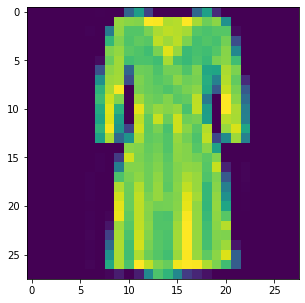

In [100]:
plt.figure(figsize=(5,5))
plt.imshow(fashion.values[10,1:].reshape(28,28))
plt.show();

In [77]:
import keras

from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [78]:
input_shape=(28, 28, 1)

In [79]:
X=np.array(fashion.iloc[:, 1:])

y=to_categorical(np.array(fashion.iloc[:,0]))

In [80]:
X_train, X_test, y_train, y_test=tts(X, y)

In [81]:
X_train=X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255

X_test=X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255

In [82]:
batch=256
n_clases=10
epocas=50

In [83]:
# modelo

modelo=Sequential()
modelo.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                  kernel_initializer='he_normal', input_shape=input_shape))

modelo.add(MaxPooling2D((2,2)))
modelo.add(Dropout(0.25))
modelo.add(Conv2D(64, (3, 3), activation='relu'))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Dropout(0.25))
modelo.add(Conv2D(128, (3, 3), activation='relu'))
modelo.add(Dropout(0.4))
modelo.add(Flatten())
modelo.add(Dense(128,  activation='relu'))
modelo.add(Dropout(0.3))
modelo.add(Dense(n_clases, activation='softmax'))


modelo.compile(loss=keras.losses.categorical_crossentropy, 
               optimizer=keras.optimizers.Adam(), 
               metrics=['accuracy'])

modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)        

In [84]:
historico=modelo.fit(X_train, y_train, batch_size=batch, epochs=epocas, verbose=0)

In [85]:
score=modelo.evaluate(X_test, y_test, verbose=0)

In [86]:
print ('Perdida testeo: ', score[0])
print ('Accuracy testeo: ', score[1])

Perdida testeo:  0.3264516592025757
Accuracy testeo:  0.8960000276565552


In [87]:
historico.history

{'accuracy': [0.37959998846054077,
  0.6561333537101746,
  0.7156000137329102,
  0.745199978351593,
  0.7731999754905701,
  0.7754666805267334,
  0.7932000160217285,
  0.8025333285331726,
  0.8142666816711426,
  0.817466676235199,
  0.8257333040237427,
  0.830133318901062,
  0.8389333486557007,
  0.8458666801452637,
  0.8515999913215637,
  0.8541333079338074,
  0.8570666909217834,
  0.8679999709129333,
  0.8672000169754028,
  0.8694666624069214,
  0.8712000250816345,
  0.8729333281517029,
  0.8784000277519226,
  0.8853333592414856,
  0.8876000046730042,
  0.8893333077430725,
  0.8913333415985107,
  0.88919997215271,
  0.892133355140686,
  0.8938666582107544,
  0.9016000032424927,
  0.8980000019073486,
  0.903333306312561,
  0.9013333320617676,
  0.9065333604812622,
  0.9070666432380676,
  0.9118666648864746,
  0.9082666635513306,
  0.9105333089828491,
  0.9149333238601685,
  0.9138666391372681,
  0.9128000140190125,
  0.9147999882698059,
  0.916533350944519,
  0.9185333251953125,
  0.9

In [88]:
acc=historico.history['accuracy']
loss=historico.history['loss']

epocas=range(len(acc))

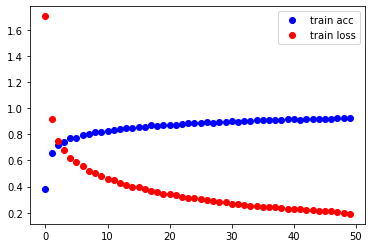

In [89]:
plt.plot(epocas, acc, 'bo', label='train acc')
plt.plot(epocas, loss, 'ro', label='train loss')
plt.legend()
plt.show();

### LSTM (Long-Short Term Memory)


![](data/lstm.png)

In [90]:
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

from sklearn.metrics import mean_squared_error as mse

In [91]:
seq_in=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

n_in=len(seq_in)

seq_in=seq_in.reshape((1, n_in, 1))



seq_out=seq_in[:, 1:, :]
n_out=n_in-1

In [92]:
# modelo
modelo=Sequential()

modelo.add(LSTM(100, activation='relu', input_shape=(n_in, 1)))
modelo.add(RepeatVector(n_out))

modelo.add(LSTM(100, activation='relu', return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))
modelo.add(LSTM(100, activation='relu', return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))
modelo.add(LSTM(100, activation='relu', return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))
modelo.add(LSTM(100, activation='relu', return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))
modelo.add(LSTM(100, activation='relu', return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))
modelo.add(LSTM(100, activation='relu', return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))
modelo.add(LSTM(100, activation='relu', return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))
modelo.add(LSTM(100, activation='relu', return_sequences=True))
modelo.add(TimeDistributed(Dense(1)))

modelo.compile(optimizer='adam', loss='mse')

In [93]:
modelo.fit(seq_in, seq_out, epochs=300, verbose=0)

modelo.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 8, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 8, 100)            80400     
_________________________________________________________________
time_distributed (TimeDistri (None, 8, 1)              101       
_________________________________________________________________
lstm_2 (LSTM)                (None, 8, 100)            40800     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 8, 1)              101       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8, 100)           

In [94]:
y_pred=modelo.predict(seq_in, verbose=0)

y_pred[0, :, 0]

array([0.17052513, 0.2834698 , 0.39593184, 0.5036054 , 0.60486305,
       0.7011142 , 0.7968147 , 0.9005352 ], dtype=float32)

In [95]:
mse(seq_in[0,:,0][1:], y_pred[0, :, 0])**0.5

0.012282547368123314

In [102]:
data = pd.read_excel('ENB2012_data.xlsx')

In [103]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [107]:
from sklearn.linear_model import LinearRegression

X = data.drop(axis = 1, columns= ['Y1','Y2'])

y = pd.concat([data['Y1'], data['Y2']], axis = 1)

model = LinearRegression()

model.fit(X,y)

r_sq = model.score(X,y) #R cuadrada que tanto se explica el modelo

print(r_sq)


0.9028650248335681


In [109]:
from sklearn.metrics import mean_squared_error

In [108]:
y_pred = model.predict(X)

In [110]:
mse = mean_squared_error(y, y_pred)

In [111]:
mse

9.328104229041728

In [116]:
network = Sequential()

network.add(Dense(8, input_shape=(8,), activation='relu'))
network.add(Dense(6, activation='relu'))
network.add(Dense(6, activation='relu'))
network.add(Dense(4, activation='relu'))
network.add(Dense(2, activation='relu'))

network.compile('adam', loss = 'mse', metrics = ['mse'])
network.fit(X,y, epochs = 1000)


Epoch 1/1000
24/24 [==============================] - 0s 1ms/step - loss: 422.1360 - mse: 422.1360
Epoch 2/1000
24/24 [==============================] - 0s 924us/step - loss: 371.0164 - mse: 371.0164
Epoch 3/1000
24/24 [==============================] - 0s 947us/step - loss: 351.8121 - mse: 351.8121
Epoch 4/1000
24/24 [==============================] - 0s 981us/step - loss: 339.9096 - mse: 339.9096
Epoch 5/1000
24/24 [==============================] - 0s 1ms/step - loss: 326.9900 - mse: 326.9900
Epoch 6/1000
24/24 [==============================] - 0s 1ms/step - loss: 319.5793 - mse: 319.5793
Epoch 7/1000
24/24 [==============================] - 0s 1ms/step - loss: 315.8929 - mse: 315.8929
Epoch 8/1000
24/24 [==============================] - 0s 1ms/step - loss: 313.6835 - mse: 313.6835
Epoch 9/1000
24/24 [==============================] - 0s 957us/step - loss: 312.1444 - mse: 312.1444
Epoch 10/1000
24/24 [==============================] - 0s 918us/step - loss: 311.5268 - mse: 311.5268